# Hypothesis 3:

The amount of crimes will increase as the proportion of high-income residents increases and the proportion of low-income residents decreases

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
import function_with_doctest as fn

In Hypothesis 3 and 4, we will use Boston's Building Inventory data. This data records the topological information of the buildings and demographic information such as the income distribution of the population. We think this provides a very fine-grained analysis. However, since this dataset lacks accurate latitude and longitude data similar to crime data, we use the street location where the building is located as the key for geographic location in our analysis to merge with the Boston crime data.

In [2]:
# data preprocessing
boston_bldg = fn.preprocessing_hypothesis_3()
boston_bldg

,id,building_typology,st_name,st_name_suf,ct_perc_income_200000_or_more,ct_perc_low_to_no_income,st_loc
1,51137,Single-Family,EVERETT,ST,4.186655,37.219036,EVERETT ST
2,18045,Single-Family,ESSEX,ST,18.404908,19.762198,ESSEX ST
3,94001,Convention/Assembly,WESTERN,AV,NaN,NaN,WESTERN AV
5,29815,Vacant,SEARLE,RD,24.619565,4.254356,SEARLE RD
6,75767,Vacant,HYDE PARK,AV,5.499276,19.619048,HYDE PARK AV
...,...,...,...,...,...,...,...
98922,31503,Single-Family,GLENELLEN,RD,12.048193,8.194954,GLENELLEN RD
98924,51491,Single-Family,TAYLOR,TE,6.573070,32.293713,TAYLOR TE
98926,68980,Single-Family,AVALON,RD,10.875706,6.417203,AVALON RD
98927,95554,Single-Family,GERRISH,ST,10.531221,13.832117,GERRISH ST


For each street, calculate the mean of the proportion of high income residents and low income residents

In [3]:
# group by low_income
boston_bldg_by_low_income = fn.boston_building_category_group_by_street(boston_bldg, 'ct_perc_low_to_no_income', 'boston_bldg_by_low_income.csv')
# group by high_income
boston_bldg_by_high_income = fn.boston_building_category_group_by_street(boston_bldg, 'ct_perc_income_200000_or_more', 'boston_bldg_by_high_income.csv')
boston_bldg_by_high_income

,ct_perc_income_200000_or_more
,mean
st_loc,
A ST,24.717626
ABBOT ST,0.618459
ABBOTSFORD ST,1.061571
ABBY RD,7.173252
ABERDEEN ST,5.869565
...,...
YUILL CI,9.868421
ZAMORA CT,9.558824


In [4]:
crime_by_street = fn.get_crime_group_by_street()
crime_by_street

,street,crime_count
0,ALBANY ST,42
1,BLUE HILL AVE,8
2,COLUMBUS AVE,2
3,COMMONWEALTH AVE,10
4,MASSACHUSETTS AVE,27
...,...,...
5406,ZEIGLER ST & BETHUNE WAY,1
5407,ZEIGLER ST & WINSLOW ST,1
5408,ZELLER ST,6
5409,ZIEGLER,1


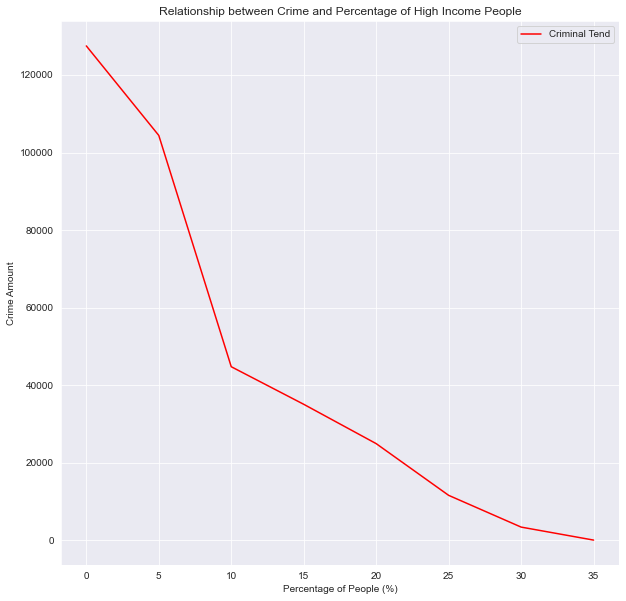

In [5]:
# line chart for high income
fn.plot_line_chart_for_street_avg_group(boston_bldg_by_high_income, crime_by_street, 'perc_high_income', 'Relationship between Crime and Percentage of High Income People')

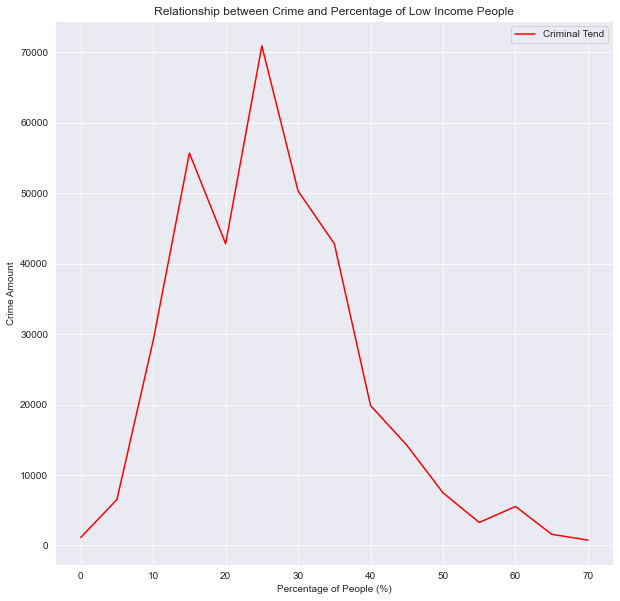

In [6]:
# line chart for low income
fn.plot_line_chart_for_street_avg_group(boston_bldg_by_low_income, crime_by_street, 'perc_low_income', 'Relationship between Crime and Percentage of Low Income People')

According to the results, we can see that as the proportion of high-income people in the region increases, the number of crimes also gradually decreases; but when the proportion of low-income people in the region increases, the number of crimes first increases and then decreases, at reach the peak in the range of 15% to 30%.

In [7]:
high_income = fn.street_avg_group(boston_bldg_by_high_income, crime_by_street, 'perc_high_income')
high_income

,group,crime_count
0,0,127484
1,5,104408
2,10,44783
3,15,35098
4,20,24957
5,25,11625
6,30,3441
7,35,90


In [8]:
low_income = fn.street_avg_group(boston_bldg_by_low_income, crime_by_street, 'perc_low_income')
low_income

,group,crime_count
0,0,1129
1,5,6518
2,10,29068
3,15,55693
4,20,42823
5,25,70904
6,30,50308
7,35,42825
8,40,19857
9,45,14231


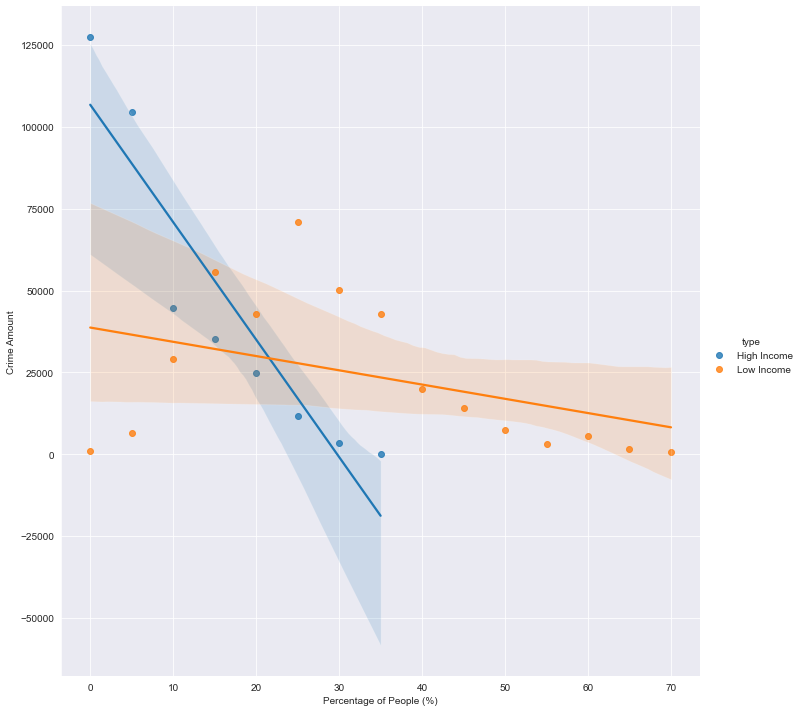

In [9]:
high_income['type'] = 'High Income'
low_income['type'] = 'Low Income'
income_regression = pd.concat([high_income, low_income])
income_regression = income_regression.iloc[:,[0, 1,2,]]
g = sns.lmplot(x="group", y="crime_count", hue="type", data=income_regression, height=10)
g.set(xlabel='Percentage of People (%)', ylabel='Crime Amount')

Through regression analysis, we can also see that the proportion of high-income groups has a significant impact on the number of crimes.

## Conclusion

Hypothesis 3 is rejected. The proportion of high-income people has a significant negative correlation with the number of crimes, while the proportion of low-income people has no significant linear relationship with the number of crimes.